In [ ]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
import os
sys.path.append('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')
os.chdir('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')

In [ ]:
df=pd.read_csv('data.csv',encoding='latin1')
df.columns=[i.lower() for i in pd.read_csv('data.csv',nrows=0).columns]

# df.loc[:,'invoicedate']=pd.to_datetime(df.invoicedate)

# df.loc[:,'year_month']=df.invoicedate.dt.to_period('M')
# df.loc[:,'week']=df.invoicedate.dt.to_period('W')

display(df.head(2))
df.shape

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(541909, 8)

In [ ]:
def generate_dt_periods(data,date_col_str='invoicedate',
                        label='weekly',frequency='W'):
  df=data.copy()
  if not (np.issubdtype(df.loc[:,date_col_str], np.datetime64)):
    df.loc[:,date_col_str]=pd.to_datetime(df.loc[:,date_col_str])
  
  df.loc[:,label]=df.invoicedate.dt.to_period(frequency)
  return df

df=generate_dt_periods(data=df)
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='daily',frequency='D')
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='hourly',frequency='H')
df=generate_dt_periods(data=df,date_col_str='invoicedate',
                        label='year_month',frequency='M')

## Demand based selection

In [ ]:
df[['daily','hourly','weekly','year_month']].nunique()#,150 -- 100,50; 30--> 20,10,-->13--5,3

daily          305
hourly        2938
weekly          53
year_month      13
dtype: int64

In [ ]:
df.loc[:,'quantity']=df.loc[:,'quantity'].abs()
df.loc[:,'unitprice']=df.loc[:,'unitprice'].apply(lambda x: max(0,x))

# grp_cols=['description','year_month']
# grp_cols=['description','weekly']
grp_cols=['description','daily']
# grp_cols=['description','hourly']

df_q=df.groupby(grp_cols)[['quantity']].sum().unstack()['quantity']
df_q=df.groupby(['description',
                 pd.Grouper(key='invoicedate',freq='7D')])[['quantity']].sum().unstack()['quantity']
df_q.loc[:,'ct_q']=df_q.notna().sum(axis=1)

df_q.loc[:,'sum_q']=df_q.sum(axis=1)
# df_q.sort_values(by=['ct_q','sum_q'],ascending=False) # We wil try to analyse those producst that have demand across all months

In [ ]:
len(df_q.columns)

56

In [ ]:
# df_quantity_final=df_q[df_q.ct_q==df['year_month'].nunique()]#There are 1209 products that have sold for all the months over an year time
df_quantity_final=df_q[df_q.ct_q==(len(df_q.columns)-2)]
t50_quantityBasedProducts=list(df_quantity_final.sort_values('sum_q',ascending=False)[:20].index)

# df_quantity_final=df_q.copy()
# t50_quantityBasedProducts=list(df_q.sort_values(by=['ct_q','sum_q'],ascending=False)[:20].index)
# t50_quantityBasedProducts

## PRice based selection

In [ ]:
# df_p=df.groupby(grp_cols)[['unitprice']].mean().unstack()['unitprice']
df_p=df.groupby(['description',
                 pd.Grouper(key='invoicedate',freq='7D')])[['unitprice']].mean().unstack()['unitprice']
df_p.loc[:,'ct_price']=df_p.notna().sum(axis=1)

df_p.loc[:,'mean_price']=df_p.mean(axis=1)


df_p.sort_values(by=['ct_price','mean_price'],ascending=False) # We wil try to analyse those products which has average price across all the year
len(df_p.columns)


56

In [ ]:
df_price_final=df_p[df_p.ct_price==(len(df_p.columns)-2)]
df_price_final.shape
t50_priceBasedProducts=list(df_price_final.sort_values('mean_price',ascending=False)[:10].index)
# df_price_final

# df_price_final=df_p.copy()
# t50_priceBasedProducts=list(df_price_final.sort_values('mean_price',ascending=False)[:10].index)


## SELECTION of top 100 products

In [ ]:
df_quantity_final

invoicedate,2010-12-01 00:00:00,2010-12-08 00:00:00,2010-12-15 00:00:00,2010-12-22 00:00:00,2010-12-29 00:00:00,2011-01-05 00:00:00,2011-01-12 00:00:00,2011-01-19 00:00:00,2011-01-26 00:00:00,2011-02-02 00:00:00,...,2011-10-19 00:00:00,2011-10-26 00:00:00,2011-11-02 00:00:00,2011-11-09 00:00:00,2011-11-16 00:00:00,2011-11-23 00:00:00,2011-11-30 00:00:00,2011-12-07 00:00:00,ct_q,sum_q
description,,,,,,,,,,,,,,,,,,,,,
6 RIBBONS RUSTIC CHARM,258.0,208.0,275.0,12.0,13.0,261.0,77.0,127.0,151.0,106.0,...,309.0,405.0,460.0,301.0,127.0,172.0,277.0,40.0,54,9271.0
60 CAKE CASES DOLLY GIRL DESIGN,27.0,226.0,341.0,25.0,26.0,248.0,250.0,86.0,139.0,5.0,...,198.0,66.0,105.0,397.0,212.0,24.0,106.0,39.0,54,7692.0
60 TEATIME FAIRY CAKE CASES,372.0,350.0,817.0,48.0,6.0,257.0,345.0,242.0,324.0,202.0,...,488.0,412.0,263.0,450.0,524.0,165.0,135.0,52.0,54,18442.0
AIRLINE BAG VINTAGE TOKYO 78,41.0,51.0,25.0,8.0,5.0,29.0,20.0,25.0,5.0,33.0,...,18.0,26.0,30.0,22.0,43.0,80.0,25.0,31.0,54,1168.0
ALARM CLOCK BAKELIKE PINK,122.0,125.0,94.0,1.0,9.0,52.0,25.0,63.0,26.0,93.0,...,462.0,319.0,101.0,112.0,100.0,119.0,252.0,59.0,54,5459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHITE SPOT BLUE CERAMIC DRAWER KNOB,161.0,52.0,227.0,12.0,20.0,65.0,81.0,90.0,148.0,18.0,...,148.0,71.0,93.0,48.0,31.0,96.0,26.0,14.0,54,4553.0
WHITE SPOT RED CERAMIC DRAWER KNOB,49.0,42.0,266.0,12.0,15.0,70.0,81.0,96.0,116.0,32.0,...,34.0,63.0,108.0,38.0,19.0,47.0,24.0,42.0,54,5135.0
WOOD BLACK BOARD ANT WHITE FINISH,1174.0,83.0,85.0,7.0,6.0,76.0,34.0,113.0,157.0,216.0,...,142.0,42.0,155.0,48.0,49.0,83.0,121.0,300.0,54,6098.0


In [ ]:
final_products=list(set(
                    t50_quantityBasedProducts+t50_priceBasedProducts
                    ))

final_products=[i for i in final_products if len(i.split())>=2]
print(len(final_products))
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T


27


In [ ]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)

## PriceSensitivityAnalysis

In [ ]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import seaborn as sns

dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=xx.loc[:,[i for i in xx.columns if '_price'in i ]]
  # xx=xx.fillna(xx.mean())
  # xx=xx[xx>0]
  # xx.dropna(axis=1,inplace=True)
  xx=np.log(xx)
  
  yy=np.log(df_tbu[y_col])
  yy=yy.fillna(yy.mean())
  yy=yy.loc[xx.index]

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']


(27, 27)

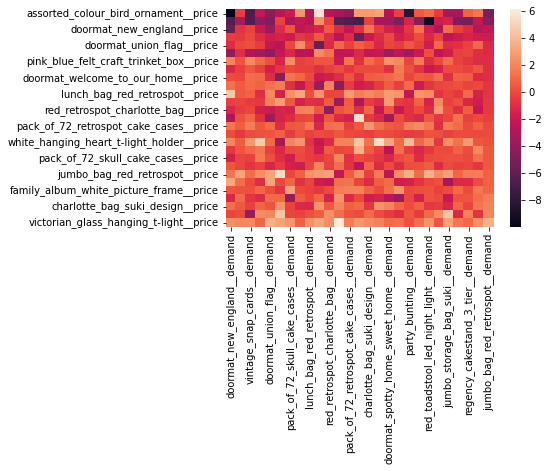

In [ ]:
sns.heatmap(df_priceSensitivity)
df_priceSensitivity.shape

In [ ]:
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

In [ ]:
# dict_betas
df_priceSensitivity.shape



(27, 27)

### If price of substitute item goes up then the demand of product under consideraion will go up thus delat demand/delta price_sunstitute is positive

### We intend to find those products that have high degree of association with each other

### We will use pair-reciprocation based rule to delineate substitute goods,For the reason we will use average of betas generated using demand_a wrt price_b and the one generated using demand_b using price_a



In [ ]:
# df_priceSensitivity.T > 
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_mask=df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.8)) & x>0
,axis=1)
df_sub_weekly=df_mask.apply(lambda s : pd.Series(s[s==True].index),axis=1)#[0]

In [ ]:
df_sub_weekly

,0,1,2,3,4,5
60_teatime_fairy_cake_cases__demand,doormat_welcome_to_our_home__price,jumbo_bag_red_retrospot__price,lunch_bag_red_retrospot__price,pink_blue_felt_craft_trinket_box__price,red_toadstool_led_night_light__price,victorian_glass_hanging_t-light__price
assorted_colour_bird_ornament__demand,charlotte_bag_suki_design__price,family_album_white_picture_frame__price,jam_making_set_printed__price,red_retrospot_cake_stand__price,red_toadstool_led_night_light__price,victorian_glass_hanging_t-light__price
charlotte_bag_suki_design__demand,assorted_colour_bird_ornament__price,doormat_welcome_to_our_home__price,family_album_white_picture_frame__price,pack_of_72_retrospot_cake_cases__price,pink_blue_felt_craft_trinket_box__price,victorian_glass_hanging_t-light__price
doormat_new_england__demand,charlotte_bag_suki_design__price,family_album_white_picture_frame__price,jumbo_storage_bag_suki__price,lunch_bag_red_retrospot__price,pink_blue_felt_craft_trinket_box__price,woodland_charlotte_bag__price
doormat_spotty_home_sweet_home__demand,charlotte_bag_suki_design__price,jumbo__bag_baroque_black_white__price,pack_of_12_london_tissues__price,pink_blue_felt_craft_trinket_box__price,victorian_glass_hanging_t-light__price,white_hanging_heart_t-light_holder__price
doormat_union_flag__demand,jumbo_bag_red_retrospot__price,jumbo_storage_bag_suki__price,lunch_bag_red_retrospot__price,victorian_glass_hanging_t-light__price,vintage_snap_cards__price,white_hanging_heart_t-light_holder__price
doormat_welcome_to_our_home__demand,60_teatime_fairy_cake_cases__price,charlotte_bag_suki_design__price,jumbo__bag_baroque_black_white__price,jumbo_bag_red_retrospot__price,vintage_snap_cards__price,woodland_charlotte_bag__price
dotcom_postage__demand,60_teatime_fairy_cake_cases__price,jumbo_bag_red_retrospot__price,jumbo_storage_bag_suki__price,pink_blue_felt_craft_trinket_box__price,victorian_glass_hanging_t-light__price,white_hanging_heart_t-light_holder__price
family_album_white_picture_frame__demand,assorted_colour_bird_ornament__price,charlotte_bag_suki_design__price,jumbo_bag_red_retrospot__price,pack_of_72_retrospot_cake_cases__price,victorian_glass_hanging_t-light__price,white_hanging_heart_t-light_holder__price
jam_making_set_printed__demand,assorted_colour_bird_ornament__price,jumbo_bag_red_retrospot__price,lunch_bag_red_retrospot__price,pack_of_12_london_tissues__price,regency_cakestand_3_tier__price,victorian_glass_hanging_t-light__price


# Analysis of products

In [ ]:
df['description']=df['description'].str.lower()
df['description'].nunique()

4206

In [ ]:
mask_genuineProduct=df['description'].apply(lambda x : len(str(x).split())>2)
df=df.loc[mask_genuineProduct,:]
df['description'].nunique()

4031

In [ ]:
mask_wrongLabels=df['description'].str.contains('wrong|thrown')
df=df.loc[~mask_wrongLabels,:]
df['description'].nunique()

4011

In [ ]:
df_qty=df.groupby(['description'])['quantity'].sum()
df_price=df.groupby(['description'])['unitprice'].mean()
lt_disposed_items=list(
    (set(df_qty[df_qty<0].index)).union(set(df_price[df_price<0].index))
    )

df=df[~df.description.isin(lt_disposed_items)]

df['description'].nunique()

4011

Text(0.5, 1.0, 'Frequency Count of 3900 products')

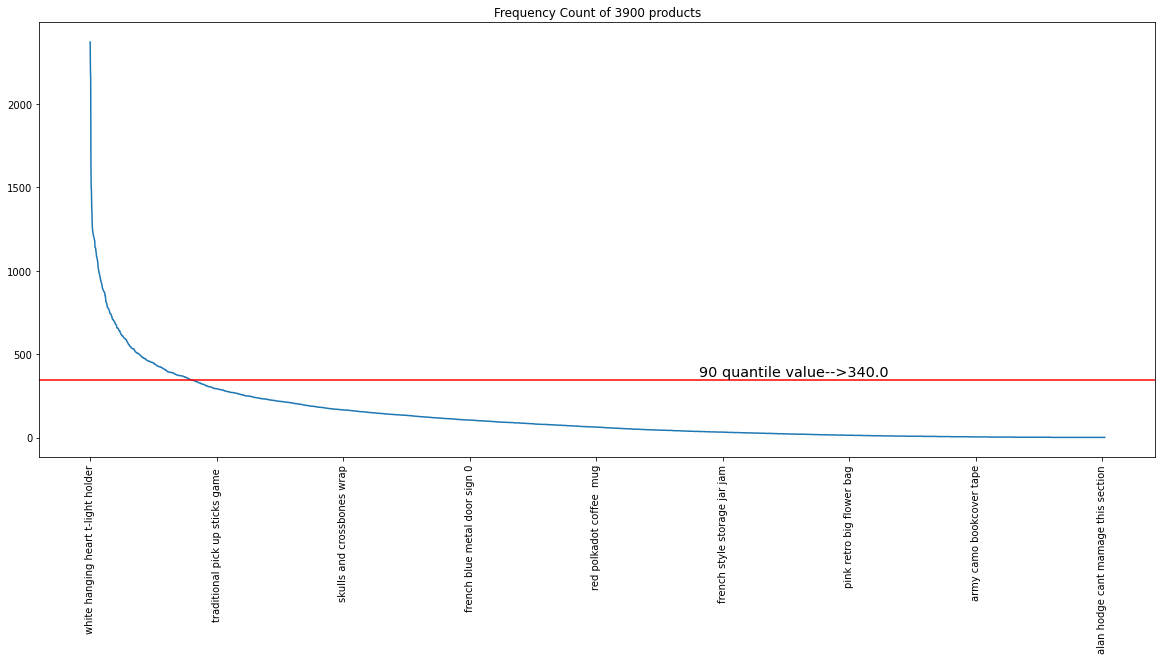

In [ ]:
import matplotlib.pyplot as plt
df_ct=df['description'].value_counts()


txt_hashProduct=str(df_ct.quantile(0.9).round(-1))


df_ct.plot(figsize=(20,8),rot=90)
plt.axhline(df_ct.quantile(0.9),color='red')
plt.text(x=df_ct.shape[0]*(6/10),y=df_ct.quantile(0.91)
,s='90 quantile value-->'+txt_hashProduct,fontdict={'fontsize':'x-large'})
plt.title('Frequency Count of 3900 products')


Text(0.5, 1.0, 'DemandSum of 3900 products')

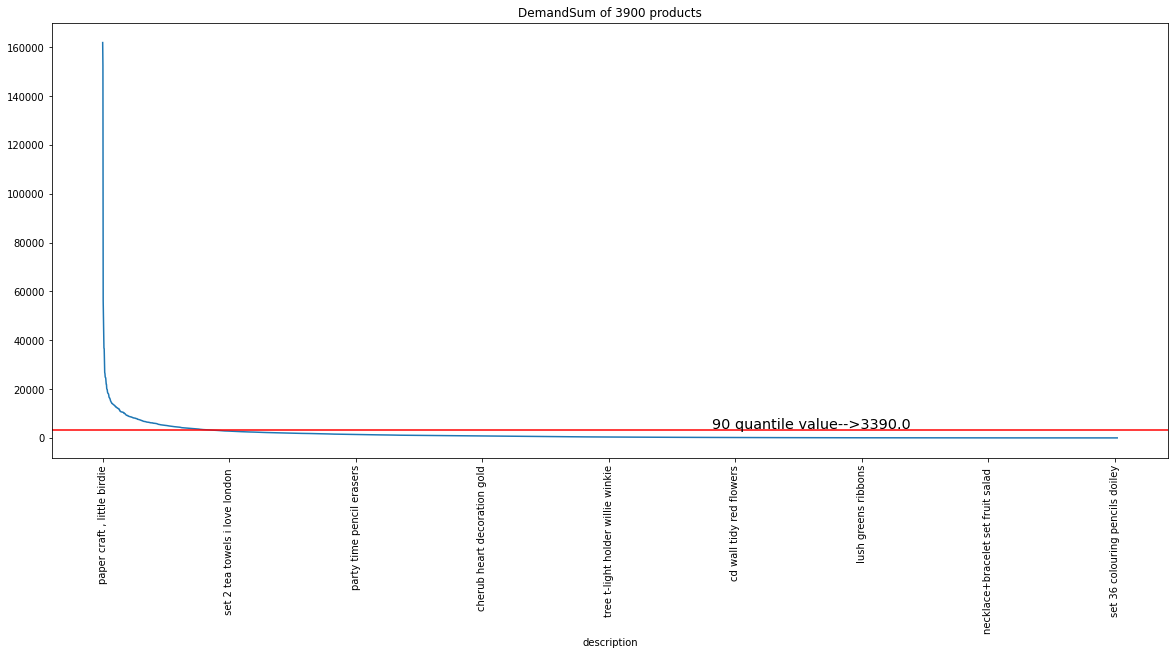

In [ ]:
import matplotlib.pyplot as plt

df_ct=df.groupby(['description'])['quantity'].sum().sort_values(ascending=False)

txt_hashProduct=str(df_ct.quantile(0.9).round(-1))


df_ct.plot(figsize=(20,8),rot=90)
plt.axhline(df_ct.quantile(0.9),color='red')
plt.text(x=df_ct.shape[0]*(6/10),y=df_ct.quantile(0.91)
,s='90 quantile value-->'+txt_hashProduct,fontdict={'fontsize':'x-large'})
plt.title('DemandSum of 3900 products')


Text(0.5, 1.0, 'PriceMean of 3900 products')

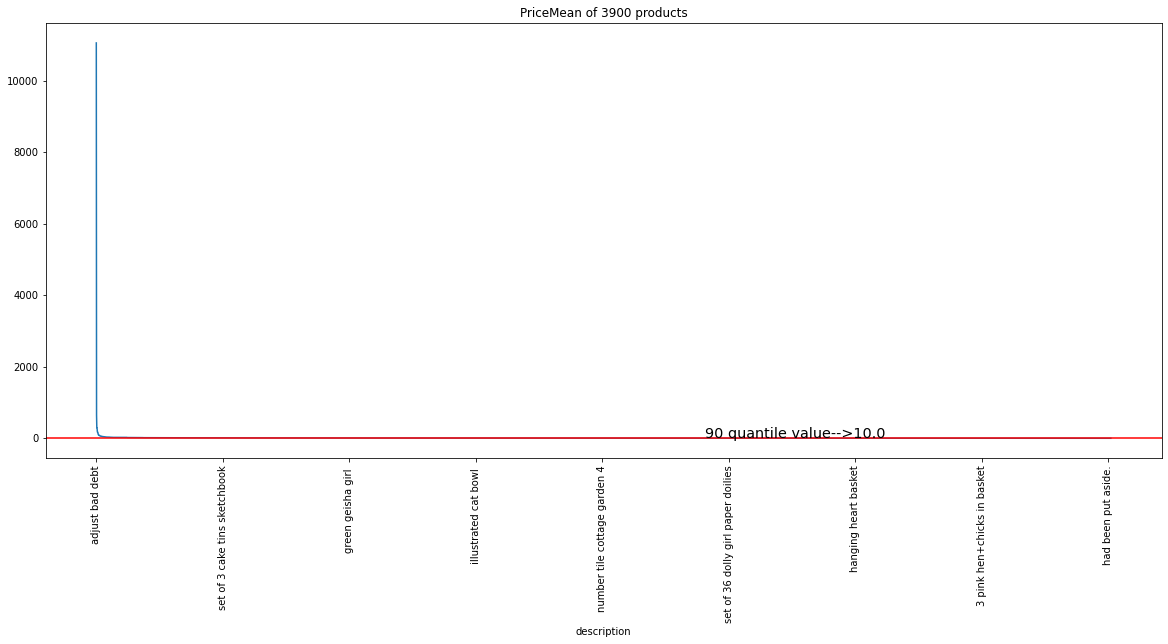

In [ ]:
df_ct=df.groupby(['description'])['unitprice'].max().sort_values(ascending=False)

txt_hashProduct=str(df_ct.quantile(0.9).round(-1))


df_ct.plot(figsize=(20,8),rot=90)
plt.axhline(df_ct.quantile(0.9),color='red')
plt.text(x=df_ct.shape[0]*(6/10),y=df_ct.quantile(0.91)
,s='90 quantile value-->'+txt_hashProduct,fontdict={'fontsize':'x-large'})
plt.title('PriceMean of 3900 products')

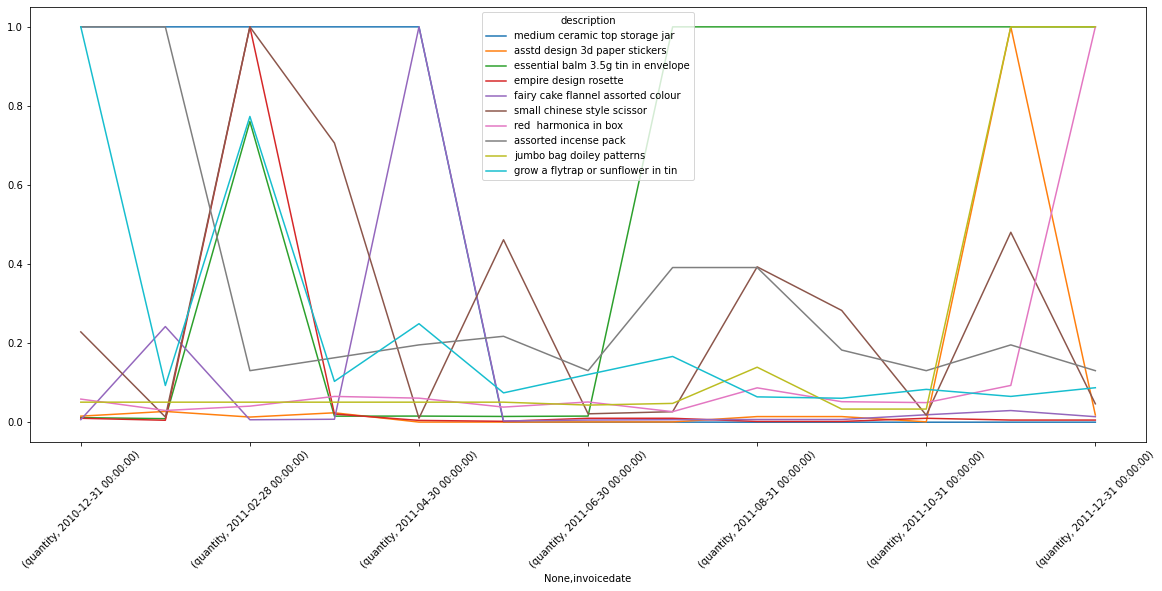

In [ ]:
lt_highDemandProducts=list(set(df_qty[df_qty>df_qty.quantile(0.9)].index))



temp_df=df[df.description.isin(lt_highDemandProducts)]

df_priceVar=temp_df.groupby(['description',
                  pd.Grouper(key='invoicedate',freq='1M')])[['quantity']].mean().unstack()

highestVarying_products=list(
    df_priceVar.var(axis=1).sort_values(ascending=False)[:10].index
                            )

((df_priceVar.loc[highestVarying_products,:].T)/(df_priceVar.loc[highestVarying_products,:].T.max())).ffill().bfill().plot(figsize=(20,8),rot=45)

# df_priceVar.loc[highestVarying_products,:].ffill(axis=1).bfill(axis=1).T.plot(figsize=(20,8),rot=45)

# Product Consistency Analysis

In [ ]:
########## Sampling of Price 
def generateSampleUnit(df,parent_col='description',
                       unit_col='unitprice',dt_col='invoicedate',frequency='7D'):
  if not (np.issubdtype(df.loc[:,dt_col], np.datetime64)):
    df.loc[:,dt_col]=pd.to_datetime(df.loc[:,dt_col])
  
  df_p=df.groupby([parent_col,
                  pd.Grouper(key=dt_col,freq=frequency)])[[unit_col]].mean().unstack()[unit_col]
  df_original=df_p.copy()
  
  df_p.loc[:,'ct_unit']=df_p.notna().sum(axis=1)

  df_p.loc[:,'mean_unit']=df_p.mean(axis=1)
  cols_added=[i for i in df_p.columns if i not in df_original.columns]

  return (df_p,cols_added)
############# RankGenerator
def rankGenerator(df_p,cols_tbu=['ct_price','mean_price']):
  temp_df=df_p.sort_values(by=cols_tbu,ascending=False)
  # temp_df.reset_index()
  temp_df.loc[:,'rk']=np.arange(temp_df.shape[0])+1
  return temp_df['rk']

# PRICE BAsed

In [ ]:
lt_freq=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))#Check rank consistency with increase in sampling frequency
f=lt_freq[0]
df_p_rk=pd.DataFrame(columns=lt_freq,index=df['description'].unique())


for f in lt_freq:
  df_p,cols_added=generateSampleUnit(df,parent_col='description',
                        unit_col='unitprice',dt_col='invoicedate',frequency=f)
  df_p_rk.loc[:,f]=rankGenerator(df_p,cols_tbu=cols_added)

cols_added

['ct_unit', 'mean_unit']

In [ ]:
df_p_rk#.mean(axis=1).sort_values()[1:20]
df_p_rk.sort_values('1D')[:30]#1D resembles that the demand consistency is very frequent across all days and 6M tells primarily about price

,6M,3M,1M,15D,7D,3D,1D
white hanging heart t-light holder,845,701,377,236,33,7,1
jumbo bag red retrospot,1126,961,496,302,44,10,2
regency cakestand 3 tier,59,48,16,11,1,1,3
assorted colour bird ornament,1456,1248,703,427,64,16,4
lunch bag red retrospot,1219,1049,574,353,54,12,5
pack of 72 retrospot cake cases,2056,1769,1018,617,95,18,6
natural slate heart chalkboard,700,602,329,210,29,6,7
jam making set with jars,424,346,199,134,20,21,8
recipe box pantry yellow design,698,590,321,205,28,24,9
lunch bag black skull.,1258,1076,576,351,53,35,10


## Quantity Based

In [ ]:
lt_freq=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))#Check rank consistency with increase in sampling frequency
f=lt_freq[0]
df_q_rk=pd.DataFrame(columns=lt_freq,index=df['description'].unique())


for f in lt_freq:
  df_q,cols_added=generateSampleUnit(df,parent_col='description',
                        unit_col='quantity',dt_col='invoicedate',frequency=f)
  df_q_rk.loc[:,f]=rankGenerator(df_q,cols_tbu=cols_added)



In [ ]:
df_q_rk

,6M,3M,1M,15D,7D,3D,1D
white hanging heart t-light holder,204,184,132,80,25,4,1
white metal lantern,1083,1024,1303,810,577,417,392
cream cupid hearts coat hanger,860,785,554,394,311,361,407
knitted union flag hot water bottle,878,941,768,511,226,379,343
red woolly hottie white heart.,616,709,698,460,699,682,607
...,...,...,...,...,...,...,...
lost in space,3225,3510,3722,3757,3791,3811,3820
set 10 cards swirly xmas tree 17104,3840,3876,3909,3918,3926,3931,3932
"letter ""u"" bling key ring",3392,3613,3780,3801,3831,3843,3851
cream hanging heart t-light holder,3543,3690,3806,3825,3853,3864,3697


In [ ]:
df_q_rk#.mean(axis=1).sort_values()[1:20]
df_q_rk.sort_values('7D')
df_q_rk.sort_values('1D')[:30]#1D resembles that the demand consistency is very frequent across all days and 6M tells primarily about price

,6M,3M,1M,15D,7D,3D,1D
white hanging heart t-light holder,204,184,132,80,25,4,1
jumbo bag red retrospot,146,110,76,47,12,3,2
regency cakestand 3 tier,730,744,585,411,81,15,3
assorted colour bird ornament,118,97,61,42,8,2,4
pack of 72 retrospot cake cases,73,78,53,26,4,1,5
lunch bag red retrospot,442,381,264,180,37,6,6
natural slate heart chalkboard,853,758,495,383,68,14,7
jam making set with jars,872,763,530,360,71,32,8
recipe box pantry yellow design,928,794,533,380,69,33,9
lunch bag cars blue,529,498,367,249,51,11,10


# Consistency vs Intensity ranker

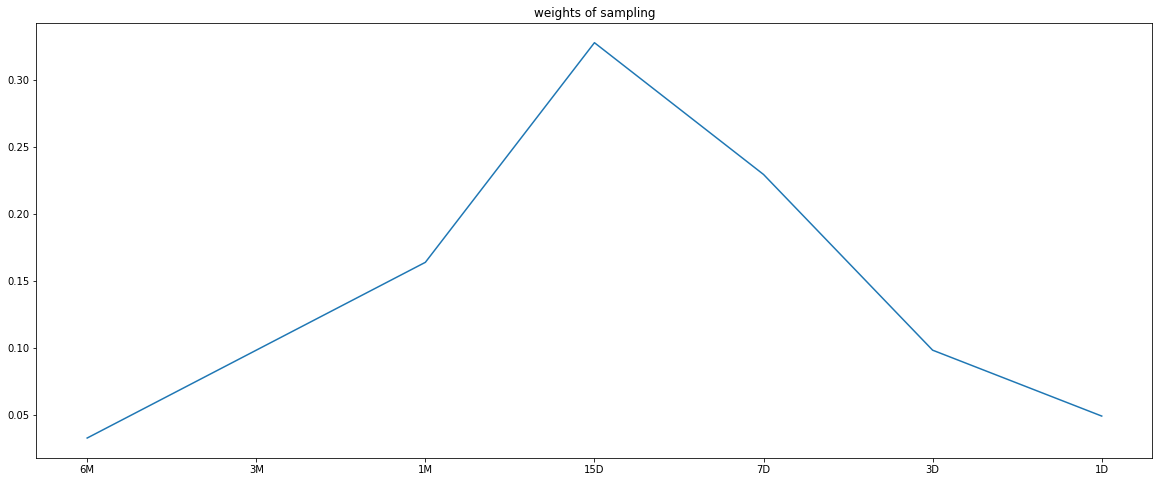

In [ ]:
s_wt=pd.Series(np.array([1,3,5,10,7,3,1.5]),
                        index=list(reversed(['1D','3D','7D','15D','1M','3M','6M']))
                )   
s_wt=s_wt/s_wt.sum()
s_wt.plot(figsize=(20,8),title='weights of sampling')

In [ ]:
df_q_rk.loc[:,'weighted_rank']=(df_q_rk*s_wt).sum(axis=1)
df_q_rk.sort_values('weighted_rank')

,6M,3M,1M,15D,7D,3D,1D,weighted_rank
pack of 12 london tissues,26,17,14,5,1,82,116,20.459016
pack of 72 retrospot cake cases,73,78,53,26,4,1,5,28.540984
assorted colour bird ornament,118,97,61,42,8,2,4,39.409836
victorian glass hanging t-light,131,105,68,43,10,19,15,44.770492
jumbo bag red retrospot,146,110,76,47,12,3,2,46.622951
...,...,...,...,...,...,...,...,...
tiny crystal bracelet red,4004,4005,4006,4006,4007,4007,4007,4006.213115
vintage bead pink jewel stand,4005,4006,4007,4007,4008,4008,4008,4007.213115
watering can single hook pistachio,4007,4008,4008,4008,4009,4009,4009,4008.344262
wire flower t-light holder,4010,4010,4010,4010,4010,4010,4010,4010.000000


In [ ]:
df_p_rk.loc[:,'weighted_rank']=(df_p_rk*s_wt).sum(axis=1)
df_p_rk.sort_values('weighted_rank')

,6M,3M,1M,15D,7D,3D,1D,weighted_rank
regency cakestand 3 tier,59,48,16,11,1,1,3,13.360656
red retrospot cake stand,73,56,19,13,2,39,81,23.557377
doormat welcome to our home,121,111,57,40,4,19,139,46.967213
enamel bread bin cream,42,37,11,8,107,111,132,51.409836
cream sweetheart mini chest,54,45,15,10,108,112,89,52.114754
...,...,...,...,...,...,...,...,...
sold as set/6 by dotcom,4007,4007,4007,4007,4007,4007,4007,4007.000000
sold in set?,4008,4008,4008,4008,4008,4008,4008,4008.000000
taig adjust no stock,4009,4009,4009,4009,4009,4009,4009,4009.000000
to push order througha s stock was,4010,4010,4010,4010,4010,4010,4010,4010.000000


In [ ]:
final_products=list(set(df_q_rk.sort_values('weighted_rank')[:20].index
                      ).union(set(df_p_rk.sort_values('weighted_rank')[:3].index))
                    )

df_quantity_final,_=generateSampleUnit(df,parent_col='description',
                        unit_col='quantity',dt_col='invoicedate',frequency='7D')
df_price_final,_=generateSampleUnit(df,parent_col='description',
                        unit_col='unitprice',dt_col='invoicedate',frequency='7D')


In [ ]:
final_products=[i for i in final_products if len(i.split())>=2]
print(len(final_products))
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T

23


In [ ]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)
df_tbu.shape


(54, 46)

In [ ]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import seaborn as sns

dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=xx.loc[:,[i for i in xx.columns if '_price'in i ]]
  # xx=xx.fillna(xx.mean())
  # xx=xx[xx>0]
  xx.dropna(axis=0,inplace=True)
  xx=np.log(xx)
  
  yy=np.log(df_tbu[y_col])
  # yy=yy.fillna(yy.mean())
  yy=yy.loc[xx.index]

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']


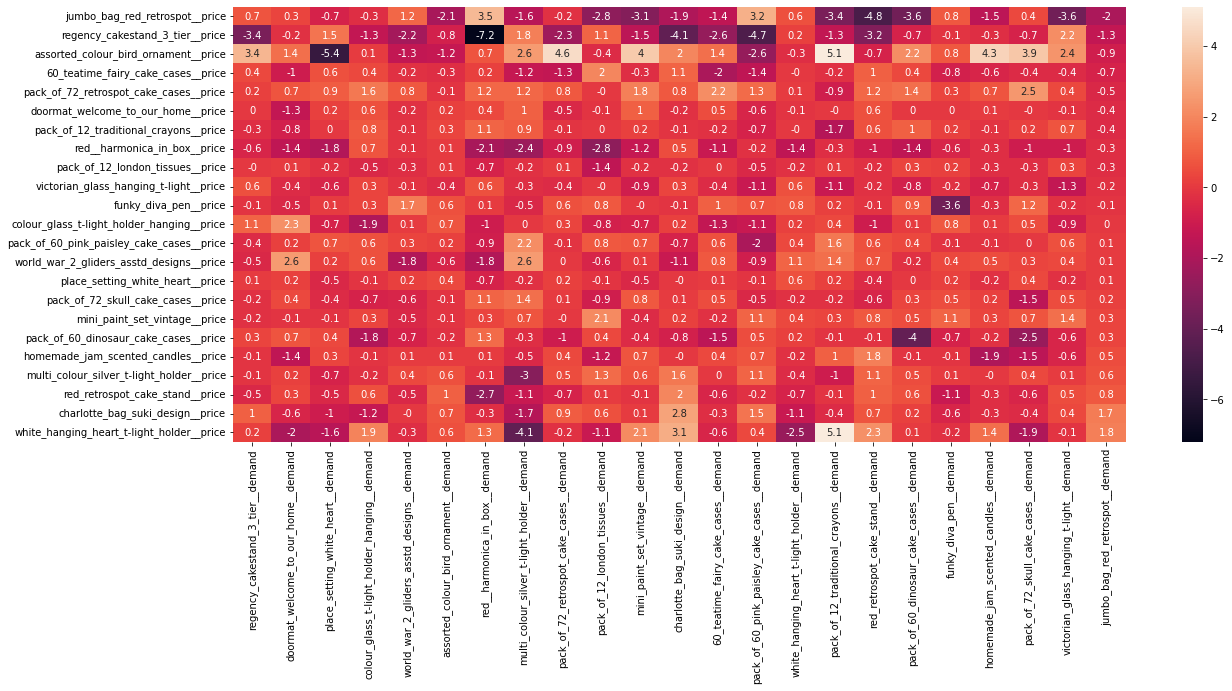

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_priceSensitivity.round(1),annot=True)

In [ ]:
# df_priceSensitivity.T > 
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
df_priceSensitivity=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2,
columns=df_priceSensitivity.columns,index=df_priceSensitivity.index)# Depends on whether if A is substitue of B then B is substitute of A

df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_mask=df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.85)) & x>0
,axis=1)
beta_fortnight=df_mask.apply(lambda s : pd.Series(s[s==True].index),axis=1)#[0]

In [ ]:
beta_weekly
beta_fortnight

,0,1,2,3
60_teatime_fairy_cake_cases__demand,assorted_colour_bird_ornament__price,charlotte_bag_suki_design__price,pack_of_12_london_tissues__price,pack_of_72_retrospot_cake_cases__price
assorted_colour_bird_ornament__demand,homemade_jam_scented_candles__price,mini_paint_set_vintage__price,pack_of_12_traditional_crayons__price,pack_of_72_retrospot_cake_cases__price
charlotte_bag_suki_design__demand,assorted_colour_bird_ornament__price,charlotte_bag_suki_design__price,red_retrospot_cake_stand__price,white_hanging_heart_t-light_holder__price
colour_glass_t-light_holder_hanging__demand,doormat_welcome_to_our_home__price,funky_diva_pen__price,pack_of_72_retrospot_cake_cases__price,white_hanging_heart_t-light_holder__price
doormat_welcome_to_our_home__demand,assorted_colour_bird_ornament__price,colour_glass_t-light_holder_hanging__price,multi_colour_silver_t-light_holder__price,world_war_2_gliders_asstd_designs__price
funky_diva_pen__demand,assorted_colour_bird_ornament__price,colour_glass_t-light_holder_hanging__price,pack_of_72_skull_cake_cases__price,world_war_2_gliders_asstd_designs__price
homemade_jam_scented_candles__demand,assorted_colour_bird_ornament__price,pack_of_72_retrospot_cake_cases__price,red_retrospot_cake_stand__price,white_hanging_heart_t-light_holder__price
jumbo_bag_red_retrospot__demand,pack_of_60_pink_paisley_cake_cases__price,red__harmonica_in_box__price,white_hanging_heart_t-light_holder__price,world_war_2_gliders_asstd_designs__price
mini_paint_set_vintage__demand,assorted_colour_bird_ornament__price,pack_of_12_london_tissues__price,pack_of_60_pink_paisley_cake_cases__price,white_hanging_heart_t-light_holder__price
multi_colour_silver_t-light_holder__demand,assorted_colour_bird_ornament__price,pack_of_60_pink_paisley_cake_cases__price,pack_of_72_skull_cake_cases__price,world_war_2_gliders_asstd_designs__price


# CONSISTENCY VISULAISZER

In [ ]:
temp_df,_=generateSampleUnit(df,parent_col='description',
                        unit_col='quantity',dt_col='invoicedate',frequency='15D')

In [ ]:
# temp_df.sort_values('ct_unit')

# temp_df[temp_df['ct_unit'].isin(range(10,20))].sort_values('mean_unit',ascending=False)
# temp_df[temp_df['ct_unit'].isin(range(20,26))].sort_values('mean_unit',ascending=False)
temp_df[temp_df['ct_unit'].isin(range(25,26))].sort_values(['ct_unit','mean_unit'],ascending=False)

temp_df.sort_values(['ct_unit','mean_unit'],ascending=False).sample(10)

invoicedate,2010-12-01 00:00:00,2010-12-16 00:00:00,2010-12-31 00:00:00,2011-01-15 00:00:00,2011-01-30 00:00:00,2011-02-14 00:00:00,2011-03-01 00:00:00,2011-03-16 00:00:00,2011-03-31 00:00:00,2011-04-15 00:00:00,...,2011-08-13 00:00:00,2011-08-28 00:00:00,2011-09-12 00:00:00,2011-09-27 00:00:00,2011-10-12 00:00:00,2011-10-27 00:00:00,2011-11-11 00:00:00,2011-11-26 00:00:00,ct_unit,mean_unit
description,,,,,,,,,,,,,,,,,,,,,
blue happy birthday bunting,7.181818,2.000000,2.400000,4.000000,8.923077,2.750,2.391304,3.136364,8.125000,4.000000,...,7.307692,6.470588,3.157895,6.000000,3.071429,2.941176,6.0,2.25,25,5.587630
blue hole punch,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,2.000000,NaN,3.000000,2.000000,NaN,NaN,6,2.428571
cherry blossom decorative flask,NaN,NaN,NaN,NaN,2.000000,2.400,2.200000,2.833333,4.400000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3.284848
beaded crystal heart green small,4.600000,1.000000,1.000000,6.333333,12.000000,1.000,1.000000,1.000000,2.000000,13.000000,...,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.0,1.00,19,3.646667
wrap pink fairy cakes,25.000000,25.000000,28.571429,25.000000,25.000000,25.000,31.250000,27.500000,57.692308,25.000000,...,25.000000,25.000000,27.777778,81.818182,25.000000,28.571429,25.0,35.00,25,32.086637
small red retrospot windmill,1.250000,9.666667,6.285714,11.400000,13.857143,8.625,16.000000,22.916667,13.200000,16.625000,...,12.600000,4.000000,12.000000,1.428571,7.000000,6.750000,12.5,6.50,25,12.111801
blue circles design monkey doll,1.500000,1.000000,2.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,3.000000,...,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,15,3.104167
silicon star bulb blue,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,NaN,NaN,NaN,NaN,1.0,4.00,6,2.285714
fire polished glass bracelet red,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3,2.750000


In [ ]:
n

## p_val correction/filtering

In [ ]:
import statsmodels.api as sm

temp_product=final_products[1]

y_col=temp_product+'__demand'
xx=df_tbu.drop([y_col],axis=1)
xx=np.log(xx.loc[:,[i for i in xx.columns if '_price'in i ]])
yy=np.log(df_tbu[y_col])

lr=sm.OLS(yy,xx)

results=lr.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                        OLS Regression Results                                        
Dep. Variable:     pack_of_12_london_tissues__demand   R-squared (uncentered):                   0.987
Model:                                           OLS   Adj. R-squared (uncentered):              0.972
Method:                                Least Squares   F-statistic:                              67.88
Date:                               Sat, 23 Apr 2022   Prob (F-statistic):                    1.65e-17
Time:                                       22:33:54   Log-Likelihood:                         -53.470
No. Observations:                                 53   AIC:                                      162.9
Df Residuals:                                     25   BIC:                                      218.1
Df Model:                                         28                                                  
Covariance Type:                           nonrobust                     

# ROUGH WORK

In [ ]:
# # !mkdir '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data'
# # !unzip '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/archive.zip' -d '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data/'
# # pd.read_csv('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data/data.csv')
# import os
# import sys
# sys.path.append('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')




In [ ]:
cols_tbu=[i.lower() for i in pd.read_csv('data.csv',nrows=0).columns]
# cols_tbu


In [ ]:
#Actually there is one particular row that is not delimited properly
#We intend to detremine that row but cannot read csv file in stream

### IGNORE Encoding latin mei thi


df=pd.DataFrame(columns=cols_tbu)
ii=0
increment_step=10000
stop_ii=6000000

# stop_date=pd.to_datetime('12/18/2010')
stop_date=pd.to_datetime('01/01/2011')

latest_date=pd.to_datetime('01/01/2010')

skipped_thousand=[]

# while ii<stop_ii:
while latest_date<= stop_date:
  # print(ii,latest_date)
  increment_step=min(500,increment_step)
  try:
    temp_df=pd.read_csv('data.csv',
                        skiprows=ii,nrows=increment_step,
                        header=None,encoding='latin1')
    temp_df.columns=cols_tbu
    temp_df.loc[:,'invoicedate']=pd.to_datetime(temp_df.invoicedate)

    df=pd.concat([df,temp_df])
    latest_date=df.invoicedate.max()

  except:
    skipped_thousand.append(ii)
    # increment_step+=500
    
    pass
  ii+=increment_step


 
df.reset_index(drop=True,inplace=True)
df.drop(0,inplace=True)

 

In [ ]:
len(skipped_thousand)
ii

42500

In [ ]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
1,536409,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-01 11:45:00,4.25,17908.0,United Kingdom
2,536409,22109,FULL ENGLISH BREAKFAST PLATE,1,2010-12-01 11:45:00,3.75,17908.0,United Kingdom
3,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
4,536409,22531,MAGIC DRAWING SLATE CIRCUS PARADE,1,2010-12-01 11:45:00,0.42,17908.0,United Kingdom
5,536409,21811,CHRISTMAS HANGING HEART WITH BELL,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
41995,539993,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-01-04 10:00:00,2.95,13313.0,United Kingdom
41996,539993,22808,SET OF 6 T-LIGHTS EASTER CHICKS,12,2011-01-04 10:00:00,2.95,13313.0,United Kingdom
41997,539993,22458,CAST IRON HOOK GARDEN FORK,8,2011-01-04 10:00:00,2.55,13313.0,United Kingdom
41998,539993,22862,LOVE HEART NAPKIN BOX,4,2011-01-04 10:00:00,4.25,13313.0,United Kingdom


In [ ]:
pd.to_datetime(df.invoicedate).max()< pd.to_datetime('01/01/2011')

True

In [ ]:
df.invoicedatedt.month #< '01/01/2010'

AttributeError: ignored

In [ ]:
df=pd.read_csv('data.csv',nrows=30000)

df.columns=[i.lower() for i in df.columns]
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
29995,538839,21874,GIN AND TONIC MUG,1,12/14/2010 13:10,1.25,14606.0,United Kingdom
29996,538839,21934,SKULL SHOULDER BAG,2,12/14/2010 13:10,1.65,14606.0,United Kingdom
29997,538839,22299,PIG KEYRING WITH LIGHT & SOUND,1,12/14/2010 13:10,1.25,14606.0,United Kingdom
29998,538839,82486,WOOD S/3 CABINET ANT WHITE FINISH,1,12/14/2010 13:10,7.95,14606.0,United Kingdom


In [ ]:
df.description.str.lower().value_counts()

white hanging heart t-light holder     170
paper chain kit 50's christmas         148
regency cakestand 3 tier               121
red woolly hottie white heart.         119
hand warmer bird design                112
                                      ... 
chunky cracked glaze necklace ivory      1
fire polished glass bracelet black       1
4 gold flock christmas balls             1
green  diamante pen in gift box          1
jam jar with blue lid                    1
Name: description, Length: 2588, dtype: int64

In [ ]:
df.invoicedate#.max()

0             InvoiceDate
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
29995    12/14/2010 13:10
29996    12/14/2010 13:10
29997    12/14/2010 13:10
29998    12/14/2010 13:10
29999    12/14/2010 13:10
Name: invoicedate, Length: 30000, dtype: object

In [ ]:
pd.read_csv('data.csv',
                        skiprows=11,nrows=100,
            header=None)

,0,1,2,3,4,5,6,7
0,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047,United Kingdom
1,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047,United Kingdom
2,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,12/1/2010 8:34,3.75,13047,United Kingdom
3,536367,22310,IVORY KNITTED MUG COSY,6,12/1/2010 8:34,1.65,13047,United Kingdom
4,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,12/1/2010 8:34,4.25,13047,United Kingdom
...,...,...,...,...,...,...,...,...
95,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809,United Kingdom
96,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,12/1/2010 9:41,4.25,15311,United Kingdom
97,536381,84854,GIRLY PINK TOOL SET,5,12/1/2010 9:41,4.95,15311,United Kingdom
98,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:41,1.95,15311,United Kingdom


In [ ]:
# df=pd.DataFrame()
# for df_temp in pd.read_csv('data.csv',nrows=50000,chunksize=1000,iterator=True):
#   try:
#     df_temp.loc[:,'chunk']=ii
#     ii+=1
#     df=pd.concat([df,df_temp])
#   except:
#     pass

In [ ]:
df

""


In [ ]:
# pd.read_csv('data.csv',
#                         skiprows=50000,nrows=100,encoding='latin1',
#                         header=None)

df=pd.read_csv('data.csv', header=None,encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7
0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,12680.0,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.stockcode.str.lower().value_counts()#.describe()
df.description.str.lower().value_counts()

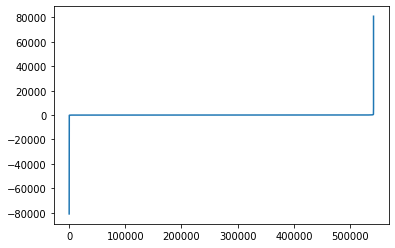

In [ ]:
# df.loc[:,'quantity'].sort_values().reset_index(drop=True).plot()
# df.loc[:,'unitprice'].abs()

In [ ]:
pd.DataFrame({
    'A':{'a':1,'b':2},
    'B':{'a':10,'b':20}
})

In [ ]:
from datetime import datetime
# (pd.to_datetime(df.loc[:,'invoicedate'])).dtype==
type(pd.to_datetime(datetime.now()))

# isinstance()

In [ ]:
xx.isna().sum()
yy.isna().sum()

# xx.describe().loc['min',:]#.max()
pd.concat([xx['jumbo_bag_red_retrospot__price'],df_tbu['jumbo_bag_red_retrospot__price']],axis=1).min()

jumbo_bag_red_retrospot__price   -inf
jumbo_bag_red_retrospot__price    0.0
dtype: float64

In [ ]:
df_tbu.fillna(df_tbu.mean(),inplace=True)
df_tbu[df_tbu>0].dropna(axis=0)
# df_tbu

,jumbo_bag_pink_vintage_paisley__demand,6_ribbons_rustic_charm__demand,party_bunting__demand,alarm_clock_bakelike_pink__demand,school_desk_and_chair__demand,lunch_bag_pink_polkadot__demand,adjust_bad_debt__demand,set/5_red_retrospot_lid_glass_bowls__demand,spaceboy_lunch_box__demand,pack_of_60_pink_paisley_cake_cases__demand,...,lunch_bag_woodland__price,cruk_commission__price,dotcom_postage__price,vintage_red_kitchen_cabinet__price,lunch_bag_spaceboy_design__price,decorative_hanging_shelving_unit__price,charlotte_bag_suki_design__price,amazon_fee__price,victorian_glass_hanging_t-light__price,jumbo__bag_baroque_black_white__price
daily,,,,,,,,,,,,,,,,,,,,,
2010-12-01,31.0,28.0,62.756757,37.0,1.571429,4.0,3.0,137.000000,27.0,122.0,...,1.650000,495.839375,588.630000,147.319444,1.650000,59.95,1.174000,6920.324048,1.880000,1.890000
2010-12-02,100.0,73.0,62.756757,4.0,1.571429,14.0,3.0,37.000000,101.0,144.0,...,1.650000,495.839375,353.002002,295.000000,1.650000,59.95,0.850000,6920.324048,1.250000,2.492650
2010-12-03,9.0,33.0,11.000000,46.0,1.571429,104.0,3.0,21.799296,16.0,133.0,...,2.844000,495.839375,440.370000,147.319444,2.503333,59.95,1.882500,6920.324048,2.510000,2.703333
2010-12-05,6.0,49.0,8.000000,17.0,1.571429,2.0,3.0,19.000000,56.0,10.0,...,1.650000,495.839375,353.002002,147.319444,1.650000,59.95,0.785000,6920.324048,1.648129,1.950000
2010-12-06,4.0,38.0,17.000000,7.0,1.571429,22.0,3.0,28.000000,28.0,56.0,...,2.503333,495.839375,918.533333,147.319444,2.747143,59.95,1.336000,6920.324048,2.006000,2.854000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,115.0,97.0,16.000000,16.0,1.571429,30.0,3.0,25.000000,180.0,57.0,...,2.476667,1100.440000,1585.452000,147.319444,2.642000,59.95,1.110000,14711.480000,2.108182,4.130000
2011-12-06,14.0,24.0,21.000000,62.0,1.571429,15.0,3.0,13.000000,78.0,26.0,...,1.650000,495.839375,736.380000,147.319444,2.312000,59.95,1.148750,6920.324048,2.035000,2.372857
2011-12-07,14.0,6.0,3.000000,40.0,1.571429,40.0,3.0,18.000000,4.0,55.0,...,2.063333,495.839375,1861.460000,147.319444,1.650000,59.95,0.806667,6920.324048,1.950000,2.490000


In [ ]:
# pd.Series(['wrong','hi','thrown']).str.contains('wrong|thrown')

# Reference

In [ ]:
# https://www.kaggle.com/datasets/carrie1/ecommerce-data
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# https://archive.ics.uci.edu/ml/datasets/Online+Retail